# Heart Failure Prediction

## Contexte

Ce projet est réalisé dans le cadre d'un cour de **Machine Learning**.

## Objectifs
* Définir les tâches
* Analyser un jeu de données (dataset) correspondant
* Définir le problème comme un problème de machine learning
* Définir la méthodologie et le protocole que l'on utilisera pour résoudre le problème
* Implémenter différentes approches du problème
* Analyser les résultats obtenus

## Définition de la problématique

Pour ce projet, nous avons choisi de nous tourner vers le domaine médical, plus précisément les problèmes cardiaques. Notre problématique est d'être capable de prédire si une personne présente des problèmes cardiaques ou non en fonction de différentes caractéristiques tirées d'un [Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Ce projet traite d'un problème de **classification binaire**.

## Analyse du jeu de données

Notre dataset présente 918 observations. Pour chacune de ces observations, nous avons 11 valeurs caractéristiques associées ainsi qu'un label.

Les **valeurs de caractéristiques** :
* Age : [years]
* Sexe : [M or F]
* ChestPainType : [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

Ainsi que le **label** associé :
* HeartDisease: [1: heart disease, 0: Normal]


## Méthodologie

* Etape 1 : Construction du dataset
* Etape 2 : Gestion des données catégorielles
* Etape 3 : K-fold cross validation
* Etape 4 : Préparation du jeu de données
* Etape 5 : Trouver les meilleurs les hyper-paramètres

## Sources

* [Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

## Implémentation

---

### Etape 1 : Construction du jeu de données

Afin de pouvoir implémenter notre modèle nous avons besoin de pouvoir exploiter notre [Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

Pour ce faire nous avons besoin :
* de lire notre jeu de données et en extraire certaines informations pour mieux en comprendre le contenu
* de séparer nos valeurs caractéristiques et nos labels présents dans le jeu de données

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


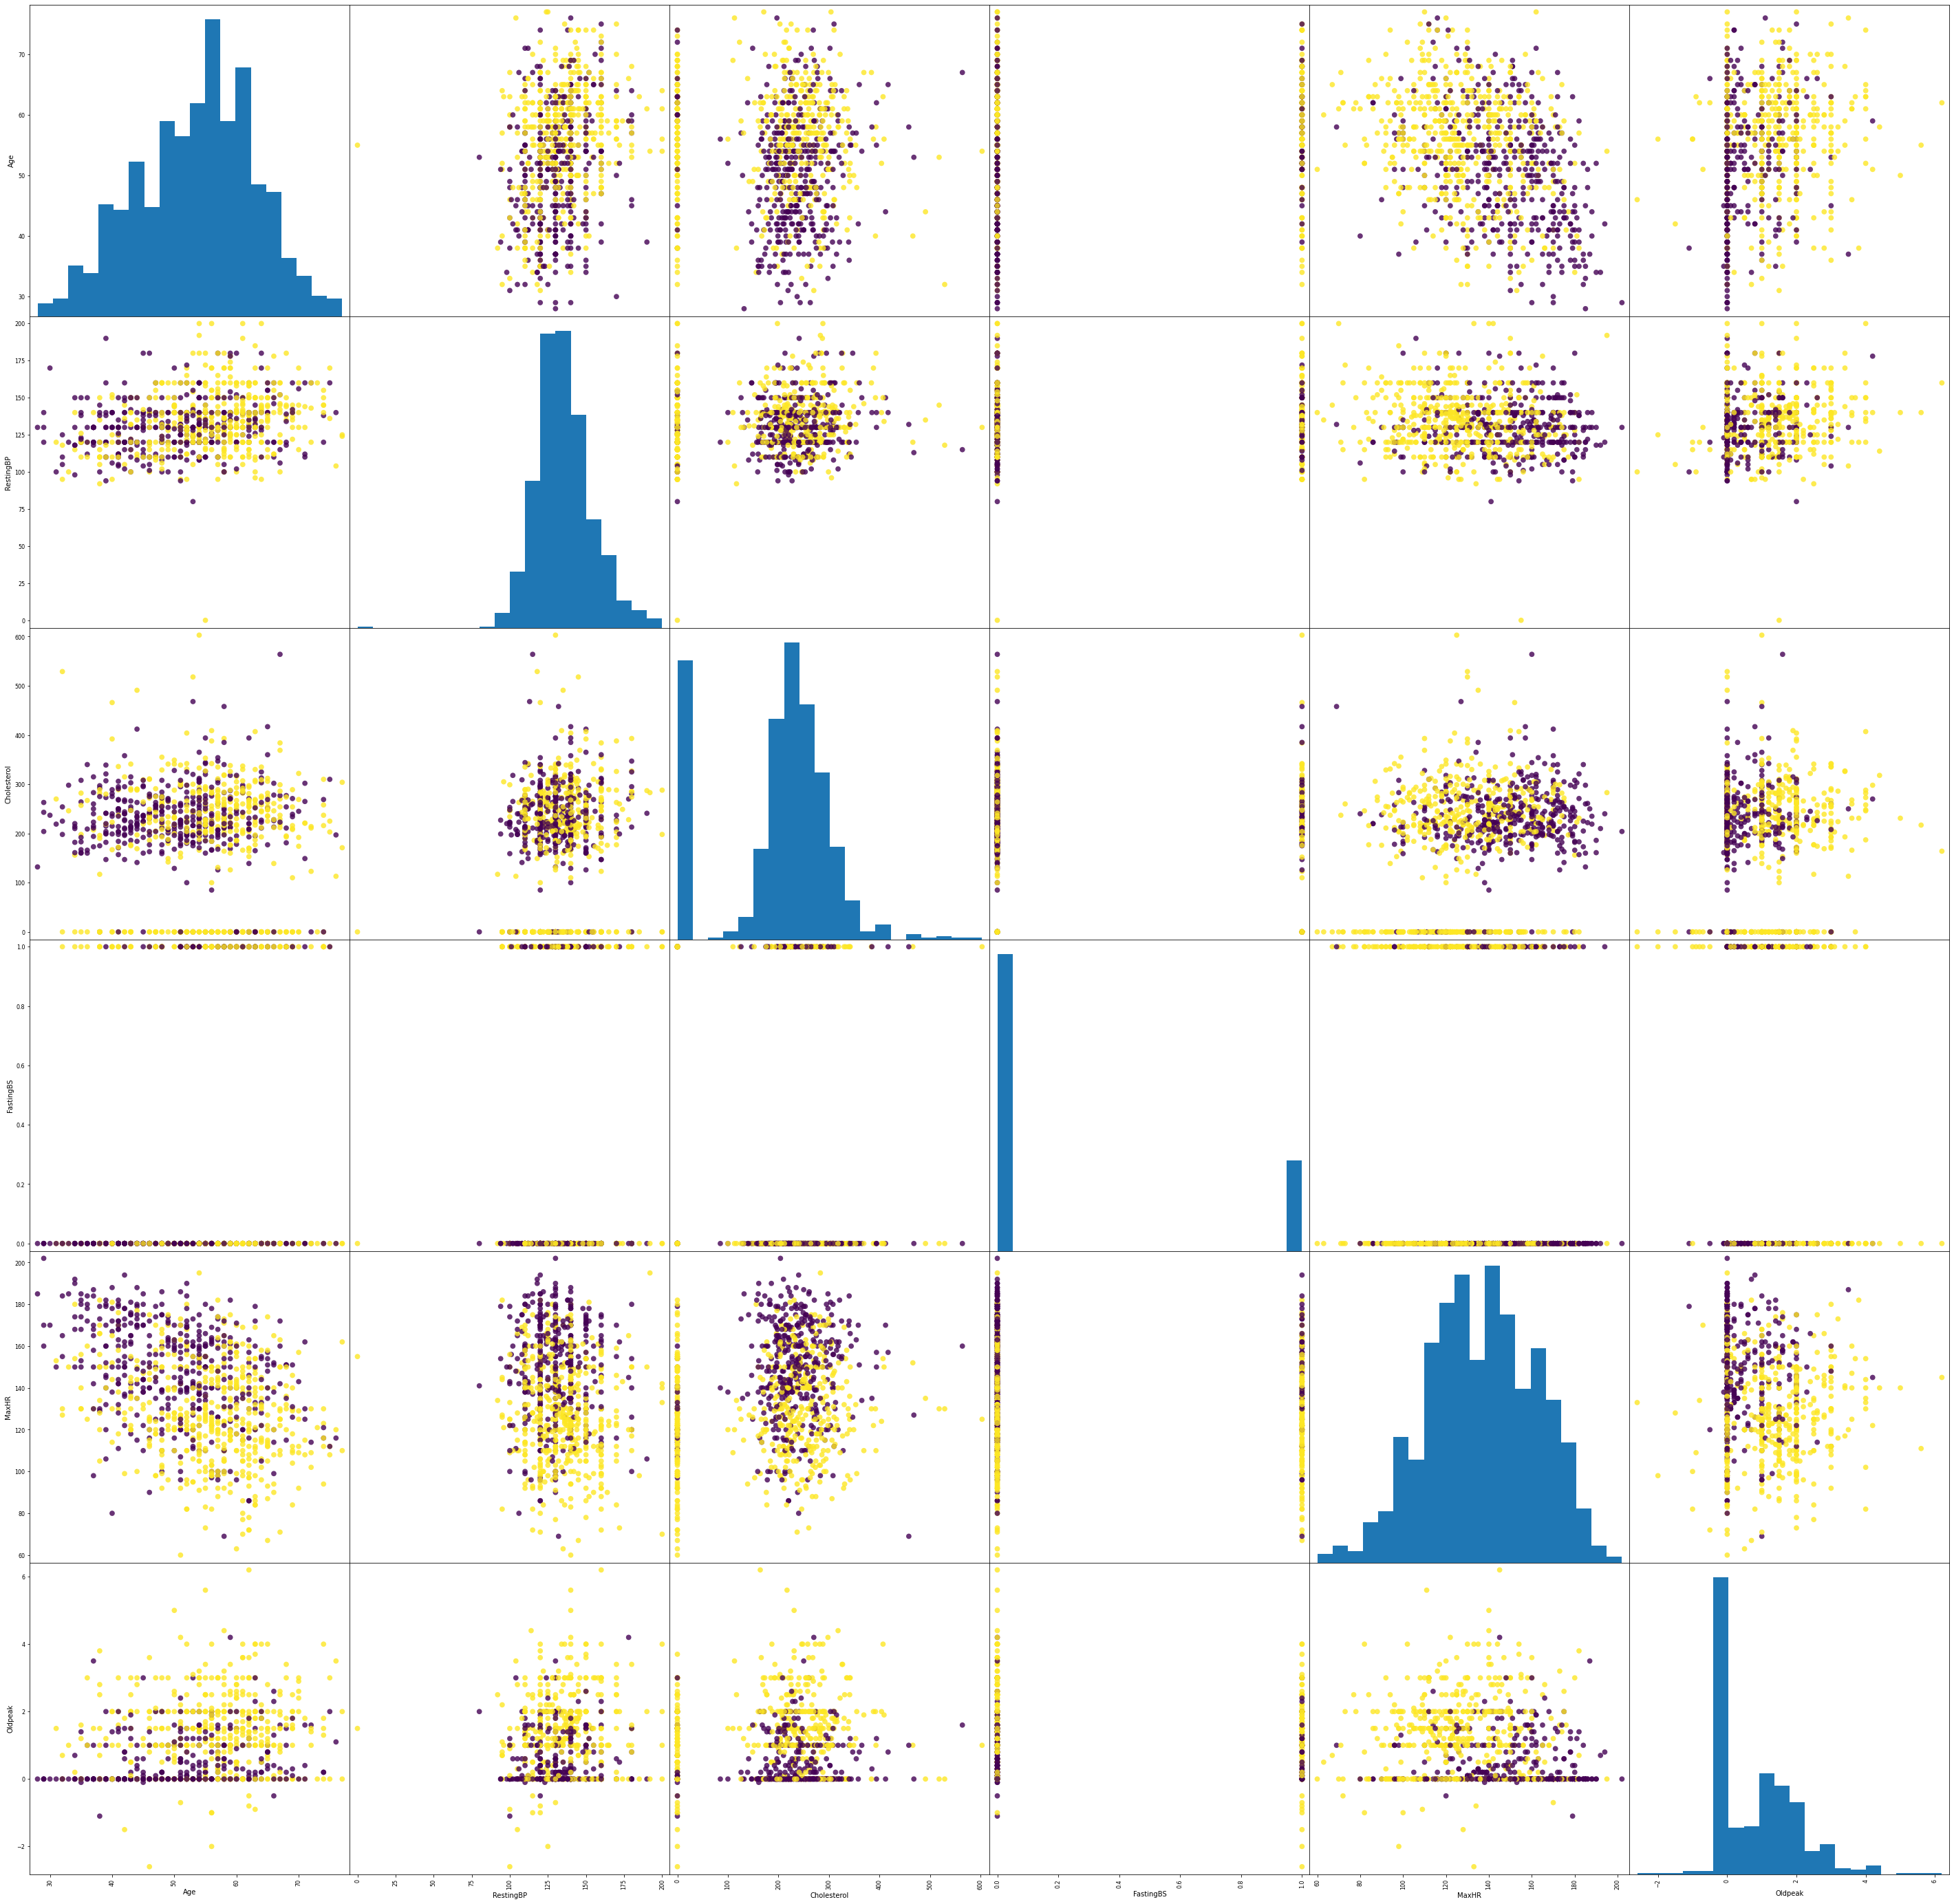

In [ ]:
from IPython.display import display

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Lecture du fichier CSV contenant notre jeu de données
df = pd.read_csv("heart.csv")

# Affichage d'informations concernant le jeu de données sous forme de tableaux
display(df.head(5)) # Affiche les 5 premières lignes du jeu de données
display(df.describe()) # Affiche des valeurs d’intérêt concernant le jeu de données

# Préparation du jeu de données, on sépare nos valeurs caractéristiques et nos labels
X = df.drop(["HeartDisease"], axis=1) # On ne garde que les features et on drop la colonne contenant nos target
y = df["HeartDisease"] # On ne garde que la colonne contenant nos target

# Visualisation des relations entre les paires de caractéristiques
_ = pd.plotting.scatter_matrix(X, c=y, figsize=(50,50), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

---

### Etape 2 : Gestion des données catégorielles

Notre **dataset** contient des valeurs non numériques dites catégorielles pour certaines des valeurs caractéristiques. 

Nous allons arbitrairement remplacer ces valeurs par des valeurs numériques pour simplifier.

**Exemple** 

| Sexe          |     Option 1    |   Option 2     |
| ------------- |  -------------  | -------------  |
| Valeurs       |   M pour Male   |  F pour Female |
| Simplificaion |        0        |        1       |

In [ ]:
# On remplace les chaines de caractère par des valeurs numériques afin de pouvoir les exploiter
X["Sex"].replace({"M":0, "F":1}, inplace=True)
X["ChestPainType"].replace({"TA":0, "ATA":1, "NAP":2, "ASY":3}, inplace=True)
X["RestingECG"].replace({"Normal":0, "ST":1, "LVH":2}, inplace=True)
X["ExerciseAngina"].replace({"N":0, "Y":1}, inplace=True)
X["ST_Slope"].replace({"Up":0, "Flat":1, "Down":2}, inplace=True)

# On transforme X en matrice afin de ne garder que des valeurs numériques (Suppression des noms de colonnes)
X = np.array(X)

---

### Etape 3 : K-fold cross validation

Afin de choisir un modèle approprié pour en extraire un prédicteur et réaliser une prédiction, nous devons d’abord tester les performances de plusieurs modèles différents choisis à l'aide des critères [d'un arbre de décisions](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

Modèles :

* Logistic Regression
* Gaussian Naive Bayes
* SVM (Support vector machine) et plus particulièrement SVC (Support vector classification)
* KNN (K-Nearest Neighbors)
* Decision Tree
* Random Forest

Pour ce faire nous allons séparer notre **dataset** en 5 fold, chaque fold va servir une fois de données de test tandis que l'on entraîne le modèle sur les 4 autres et on va ainsi calculer le score moyen de généralisation pour chaque modèle. 

La métrique utilisé pour calculer le score est la précision (on vérifie que la prédiction est exactement la même que le label dans le jeu de test) ([accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    LogisticRegression(solver='lbfgs'),
    GaussianNB(),
    SVC(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=10),
    RandomForestClassifier(random_state=10)
]

#from sklearn.model_selection import cross_validate # Implémentions de k-fold, 5 itérations par défaut
#
#for model in models:
#    result = cross_validate(model, X, y, scoring=('accuracy', 'average_precision'))
#    print("Score pour le model {} : {} soit une moyenne de {:.2f}".format(model, result['test_accuracy'], np.mean(result['test_accuracy'])))
#    #print("average_precision pour le model {} : {} soit une moyenne de {:.2f}".format(model, result['test_average_precision'], np.mean(result['test_average_precision'])))

# La fonction cross_validate ne nous permet pas de faire du preprocessing sur le jeu d'entrainement et de test de manière séparée
# On écrit donc une boucle équivalente à cette fonction à l'aide de KFold afin de pouvoir faire correctement du preprocessing sur notre jeu de données

from sklearn.model_selection import KFold
from sklearn import preprocessing

for model in models:
    kf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = preprocessing.scale(X[train_index]), preprocessing.scale(X[test_index])
        y_train, y_test = y[train_index], y[test_index]
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print("Score moyen du model {} : {:.3f}".format(model, np.mean(scores)))

Score moyen du model LogisticRegression() : 0.788
Score moyen du model GaussianNB() : 0.802
Score moyen du model SVC() : 0.805
Score moyen du model SVC(kernel='linear') : 0.785
Score moyen du model SVC(kernel='poly') : 0.758
Score moyen du model KNeighborsClassifier() : 0.813
Score moyen du model DecisionTreeClassifier(random_state=10) : 0.752
Score moyen du model RandomForestClassifier(random_state=10) : 0.838


---

### Etape 4 : Préparation du jeu de données

Pour l'implémentation, nous avons choisi le modèle **Random forest** qui a obtenu le meilleur score moyen de généralisation à l'étape précédente.
Maintenant nous allons donc procéder à la constitution de nos données d'entrainement et de nos données de test dans le but de procéder à l'implémentation de notre modèle.
Pour ce faire nous allons réserver une partie de nos données comme suit.

| Type          |     Volumétrie des données    |
| ------------- |  -------------  |
| Entrainement       |   80%  |
| Tests |        20%       |


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# On cherche à faire en sorte que nos features soient comprises entre -1 et 1 afin d'accélerer le temps de proccess
# et améliorer la précision sur les modèles basés sur la distance comme SVM et KNN
# On sépare le preprocessing des X d'entraînement et des X de test afin de ne pas avoir de data leak
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

---

### Etape 5 : Trouver les meilleurs les hyper-paramètres

Pour créer notre modèle nous allons nous servir de la fonction python suivante : 
```
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]
```
Cette fonction comporte un certain nombre de paramètres que l'on appelle hyper-paramètres qui peuvent être modifiés et qui peuvent potentiellement améliorer la phase d'entraînement du modèle.

Dans cette étape nous cherchons donc à trouver les meilleurs hyper-paramètres pour notre modèle **RandomForestClassifier**. 

Pour ce faire nous allons utiliser les fonctions [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) et [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) dans le but de trouver la meilleure valeur possible pour les hyper-paramètres impactants. 
Ces deux fonctions utilisent des approches différentes pour la recherche des paramètres. La première va tester sur un certain nombres d'itérations des paramètres choisis aléatoirement dans un certain intervalle prédéfinis. La deuxième va tester toutes les valeurs que l'on passe en paramètres de la fonction.

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Création du modèle RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)

# Entrainement du modèle avec les hyper-paramètres par défaut
print("Score avec hyper-parametres par défaut : {:.2f}".format(rfc.fit(X_train, y_train).score(X_test, y_test)))

# Entrainement du modèle avec les meilleur hyper-paramètres
param_distributions = {'n_estimators': randint(100, 1000), 'max_features':randint(1,10), 'max_depth': randint(1,10), 'min_samples_split':randint(2,10)}
search = RandomizedSearchCV(estimator=rfc, n_iter=10, param_distributions=param_distributions)
search.fit(X_train, y_train)

print("Meilleurs hyper-paramètres : {}".format(search.best_params_))
print("Score avec les meilleurs hyper-paramètres : {:.5f}".format(search.score(X_test, y_test)))

Score avec hyper-parametres par défaut : 0.83
Meilleurs hyper-paramètres : {'max_depth': 9, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 782}
Score avec les meilleurs hyper-paramètres : 0.85326


In [ ]:
from sklearn.model_selection import GridSearchCV

# Création du modèle RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)

# Entrainement du modèle avec les hyper-paramètres par défaut
print("Score avec hyper-parametres par défaut : {:.2f}".format(rfc.fit(X_train, y_train).score(X_test, y_test)))

# Entrainement du modèle avec les meilleurs hyper-paramètres
param_grid = {'n_estimators':[75, 300, 1000], 'max_features':[1, 3, 4], 'max_depth':[1, 5, 7, 9], 'min_samples_split':[2, 5, 8]}
search = GridSearchCV(estimator=rfc, param_grid=param_grid).fit(X_train, y_train)

print("Meilleurs hyper-paramètres : {}".format(search.best_params_))
print("Score avec les meilleurs hyper-paramètres : {:.5f}".format(search.score(X_test, y_test)))

Score avec hyper-parametres par défaut : 0.83
Meilleurs hyper-paramètres : {'max_depth': 9, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 75}
Score avec les meilleurs hyper-paramètres : 0.86957


## Analyse des résultats

Notre recherche des meilleurs hyper-paramètres nous a donc permis d’améliorer nos résultats de près de 4% ce qui n'est pas négligeable. Nous nous sommes seulement concentrés sur 4 hyper-paramètres jugés comme ayant le plus d'impact sur l’entraînement. On pourrait probablement encore améliorer les résultats en testant plus de valeurs d’hyper-paramètres, mais c'est une opération pouvant être longue et qui dépend beaucoup de la puissance de la machine utilisée pour l’entraînement.

Concernant la taille du jeu de données, l'utilisation de 918 observations labélisées semble suffisante pour obtenir des résultats satisfaisants avec de l’apprentissage supervisé, pour de l'apprentissage non supervisé ou de l'apprentissage profond, il faudrait beaucoup plus de données pour avoir un modèle précis.

Pour autant, dans l'état actuel de notre prédicteur qui a un taux d'erreur d'environ 13%, il ne permet pas de remplacer le contrôle d'un opérateur humain pour délivrer un avis médical sur un sujet aussi sensible que la santé et plus particulièrement les problèmes cardiaques. Il pourra au mieux permettre d'avoir une première idée de si nous avons un problème cardiaque ou non.